# 1. Introduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1. Example: Polynomial Curve Fitting

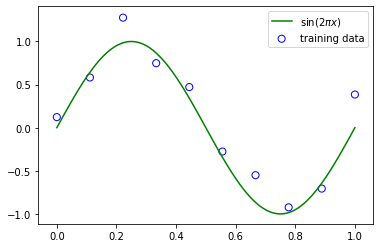

In [30]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [38]:
a = np.ones((1,2)); a.sum()

2.0

0.5077388197762417
0.25032422486427586
0.01725614834029585
0.3892033837408227


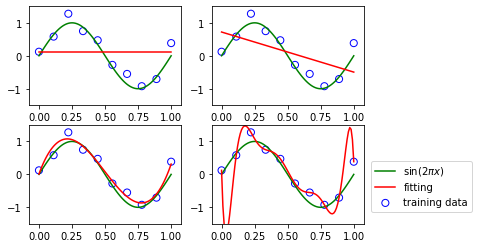

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    poly = PolynomialFeatures(degree)
    x_train_trans = poly.fit_transform(x_train.reshape(x_train.shape[0], 1))
    x_test_trans = poly.transform(x_test.reshape(x_test.shape[0], 1))

    model = LinearRegression().fit(x_train_trans, y_train) 
    y = model.predict(x_test_trans)
    
    mse = mean_squared_error(y, y_test)
    print(mse)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()